# BAO Fisher matrix

## Observable: 

In [1]:
%load_ext autoreload
%autoreload 2


In [10]:
#load modules
import numpy as np, sys, os
from astropy import constants as const
from astropy import units as u
from astropy import coordinates as coord
from astropy.cosmology import FlatLambdaCDM

sys.path.append( 'modules' )
import sne_cmb_fisher_tools, tools, misc
from pylab import *

In [3]:
rcParams['figure.dpi'] = 150
rcParams['figure.facecolor'] = 'white'


In [25]:
paramfile = 'data/params_cobaya.ini'
param_dict = misc.get_param_dict(paramfile)

pars, camb_results = sne_cmb_fisher_tools.set_camb(param_dict, lmax = 10, WantTransfer = False)
cosmo = None


bao_data_fd = 'data/bao_data/desi_bao_dr2/desi_bao_dr2_mock/'
bao_data_fname = '%s/desi_gaussian_bao_ALL_GCcomb_mean.txt' %(bao_data_fd)
bao_data_cov_fname = '%s/desi_gaussian_bao_ALL_GCcomb_cov.txt' %(bao_data_fd)
bao_data_cov = np.loadtxt( bao_data_cov_fname )
print( bao_data_cov.shape )


boa_rec = np.recfromtxt(bao_data_fname)

for curr_rec in boa_rec:
    curr_rec = list( curr_rec )
    curr_z, curr_val, curr_obs = curr_rec
    curr_obs = curr_obs.decode("utf-8")
    curr_model_val = tools.bao_model(param_dict, [curr_z], [curr_obs], cosmo = cosmo, camb_results = camb_results)[0]
    print( curr_z, curr_val, curr_obs, curr_model_val )

(13, 13)
0.295 8.166066532526074 DV_over_rs 8.060529355065404
0.51 13.728292333586483 DM_over_rs 13.506389509400751
0.51 23.535470855055255 DH_over_rs 22.749707761615056
0.706 18.0980681032203 DM_over_rs 17.70841553502408
0.706 21.088868481299105 DH_over_rs 20.177796969320315
0.934 22.60927132714857 DM_over_rs 22.004302240674438
0.934 18.54064567877087 DH_over_rs 17.576210531957013
1.321 29.068800284483835 DM_over_rs 28.09371654972912
1.321 15.0015856415327 DH_over_rs 14.070411665981885
1.484 31.412573973445234 DM_over_rs 30.28851970877456
1.484 13.780566189305878 DH_over_rs 12.885020417913811
2.33 9.301822052666541 DH_over_rs 8.619113225980817
2.33 40.98963777048131 DM_over_rs 39.19881132573699


# Get the derivatives

In [40]:
#bao_params = ['As', 'h', 'ns', 'omch2', 'ombh2', 'tau', 'ws', 'wa', 'mnu', 'neff', 'nrun']
bao_params = ['h', 'omch2', 'ws', 'wa']#, 'mnu']

bao_deriv_dict = {}
for curr_rec in boa_rec:
    curr_rec = list( curr_rec )
    curr_z, curr_val, curr_obs = curr_rec
    curr_obs = curr_obs.decode("utf-8")
    print( curr_rec )
    curr_bao_deriv_dic = tools.get_bao_derivatives(curr_z, curr_obs, param_dict, bao_params)
    #bao_deriv_dict[curr_z][curr_obs] = deriv_val
    derv_keyname = (curr_z, curr_obs)
    bao_deriv_dict[derv_keyname] = curr_bao_deriv_dic

print( bao_deriv_dict )

[0.295, 8.166066532526074, b'DV_over_rs']
[0.51, 13.728292333586483, b'DM_over_rs']
[0.51, 23.535470855055255, b'DH_over_rs']
[0.706, 18.0980681032203, b'DM_over_rs']
[0.706, 21.088868481299105, b'DH_over_rs']
[0.934, 22.60927132714857, b'DM_over_rs']
[0.934, 18.54064567877087, b'DH_over_rs']
[1.321, 29.068800284483835, b'DM_over_rs']
[1.321, 15.0015856415327, b'DH_over_rs']
[1.484, 31.412573973445234, b'DM_over_rs']
[1.484, 13.780566189305878, b'DH_over_rs']
[2.33, 9.301822052666541, b'DH_over_rs']
[2.33, 40.98963777048131, b'DM_over_rs']
{(0.295, 'DV_over_rs'): {'h': -9.822535247007565, 'omch2': -5.047895353097095, 'ws': -1.1170792986818334, 'wa': -0.10919056321236909}, (0.51, 'DM_over_rs'): {'h': -15.664345661706918, 'omch2': -10.328265510222147, 'ws': -2.0714162869190034, 'wa': -0.2472871213944572}, (0.51, 'DH_over_rs'): {'h': -19.07724955503245, 'omch2': -34.59427342878445, 'ws': -5.439256414929083, 'wa': -0.9814669513472651}, (0.706, 'DM_over_rs'): {'h': -18.804935412469842, 'omc

# Get BAO FIsher matrix now

In [41]:
desi_dr2_bao_fisher_mat = tools.get_bao_fisher(bao_params, bao_data_cov, bao_deriv_dict)


# Plot Fisher constraints

(-0.05500000000000001,
 0.05500000000000001,
 -0.05500000000000001,
 0.05500000000000001)

<Figure size 900x600 with 0 Axes>

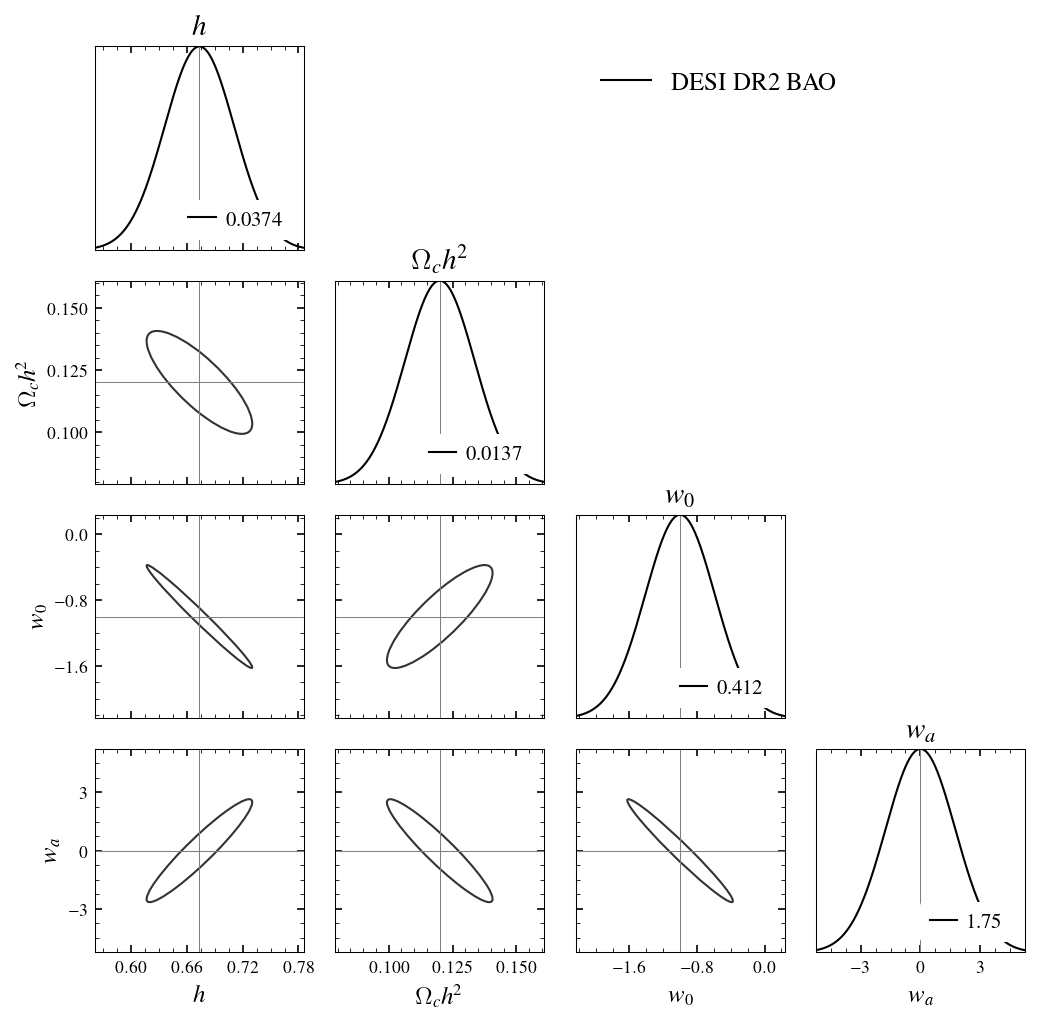

In [42]:
#make plot
desired_params_to_plot = bao_params
color_dic = {0: 'navy', 1: 'darkgreen', 2: 'goldenrod', 3: 'orangered', 4: 'black'}
fix_axis_range_to_xxsigma = 3
fsval = 12

clf()
tr, tc = len( desired_params_to_plot ), len( desired_params_to_plot )
figure(figsize = (tr+4, tc+4))
subplots_adjust(hspace=0.15, wspace = 0.15)

bao_fisher_dic_to_plot = {'desi_dr2_bao': desi_dr2_bao_fisher_mat}
color_dic = {'desi_dr2_bao': 'black'}
label_dic = {'desi_dr2_bao': 'DESI DR2 BAO'}
color_dic, ls_dic = misc.make_triangle_plot(bao_fisher_dic_to_plot, tr, tc, bao_params, param_dict, desired_params_to_plot, fsval = fsval, color_dic = color_dic, fix_axis_range_to_xxsigma = fix_axis_range_to_xxsigma)#, one_or_two_sigma = 1, fsval = 12, noofticks = 4)

#legend
if len(desired_params_to_plot)>=3:
    ax = subplot(tr, tc, 3)
elif len(desired_params_to_plot)==2:
    ax = subplot(tr, tc, 2)
else:
    ax = subplot(tr, tc, 1)
for bao_keyname in bao_fisher_dic_to_plot:
    plot([], [], color = color_dic[bao_keyname], label = r'%s' %(label_dic[bao_keyname]))

legend(loc = 2, fontsize = fsval, framealpha = 0.)
axis('off')

